In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [3]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
max(train_Y)

9

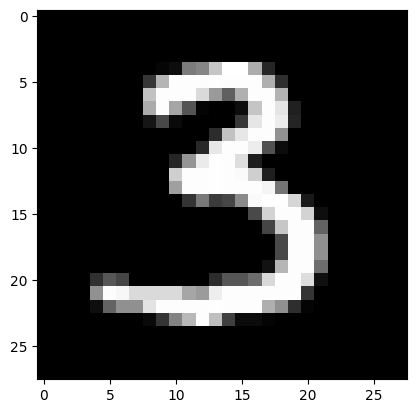

3


In [5]:
plt.imshow(train_X[490], cmap = 'gray')
plt.show()
print(train_Y[490])

In [6]:
from keras.utils import to_categorical

In [7]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [8]:
print(train_Y[490])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [9]:
print(np.max(train_X[5685]))

255


In [10]:
train_X = train_X / 255
test_X = test_X / 255

In [11]:
print(np.max(train_X[490]))

1.0


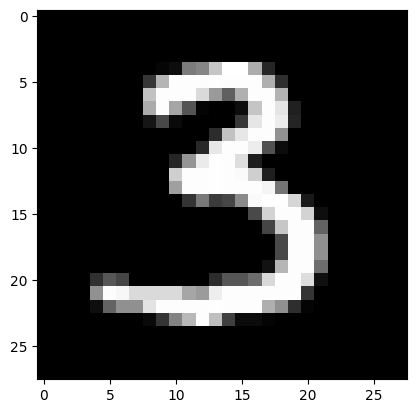

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [12]:
plt.imshow(train_X[490], cmap = 'gray')
plt.show()
print(train_Y[490])

In [13]:
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

In [14]:
print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [15]:
from keras.models import Sequential
import keras
from keras.layers import Conv2D, Dense

In [16]:
model = Sequential(name = 'Thala_7')
model.add(keras.Input(shape = (28, 28, 1)))
model.add(Conv2D(50, kernel_size = (5, 5), strides = (1, 1), padding = 'valid', activation = 'relu'))
model.add(Conv2D(100, kernel_size = (5, 5), strides = (1, 1), padding = 'valid', activation = 'relu'))
model.add(Conv2D(200, kernel_size = (5, 5), strides = (1, 1), padding = 'valid', activation = 'relu'))
model.add(Conv2D(400, kernel_size = (5, 5), strides = (1, 1), padding = 'valid', activation = 'relu'))
# model.add(Conv2D(800, kernel_size = (5, 5), strides = (1, 1), padding = 'valid', activation = 'relu'))
model.add(keras.layers.Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [17]:
model.summary()

Model: "Thala_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 50)        1300      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 100)       125100    
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 200)       500200    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 400)       2000400   
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 1024)              58983424  
                                                                 
 dense_1 (Dense)             (None, 10)                1025

In [18]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
hist = model.fit(train_X, train_Y, epochs = 20, batch_size = 200, validation_split = 0.1)

Epoch 1/20
270/270 [==============================] - 1130s 4s/step - loss: 0.2159 - accuracy: 0.9352 - val_loss: 0.0628 - val_accuracy: 0.9832
Epoch 2/20
270/270 [==============================] - 885s 3s/step - loss: 0.0460 - accuracy: 0.9853 - val_loss: 0.0478 - val_accuracy: 0.9875
Epoch 3/20
270/270 [==============================] - 902s 3s/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0316 - val_accuracy: 0.9917
Epoch 4/20
270/270 [==============================] - 891s 3s/step - loss: 0.0216 - accuracy: 0.9929 - val_loss: 0.0285 - val_accuracy: 0.9937
Epoch 5/20
270/270 [==============================] - 877s 3s/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.0306 - val_accuracy: 0.9913
Epoch 6/20
270/270 [==============================] - 828s 3s/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0309 - val_accuracy: 0.9928
Epoch 7/20
270/270 [==============================] - 1063s 4s/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.0421 - val_accuracy: 0.99


KeyboardInterrupt

